<a href="https://colab.research.google.com/github/sumitwalke/Iris-Classification/blob/main/Iris_Flower_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the dataset and the libraries

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
# np.version.version

#Read the CSV/XLXS files

In [64]:
df = pd.read_csv('/content/drive/MyDrive/TY MLL/Iris_flower_dataset.csv')

#Display the dataset

In [65]:
# Display the mathematical description of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [66]:
#  Display the datatype of each column/feature of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [67]:
# Reads data from the head for the first 5 rows and can be changed accordingly
df.head()
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [68]:
# Reads data from the tail for the last 5 rows and can be changed accordingly
df.tail()
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [69]:
# Prints all the attributes/features in the data frame
df_columns = df.columns
i = 1
for x in df_columns:
  print(i,':', x)
  i= i+1

1 : Id
2 : SepalLengthCm
3 : SepalWidthCm
4 : PetalLengthCm
5 : PetalWidthCm
6 : Species


#Check for the null values in the dataset

In [70]:
#  Use the df.isna() it checks whether the objects of a Dataframe or a Series contain missing or null values (NA, NaN) and
#  returns a new object with the same shape as the original but with boolean values True or False as the elements. True indicates the presence
#  of null or missing values and False indicates otherwise.

df.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [71]:
# Count the number of non-null values
df.isna().apply(pd.value_counts)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
False,150,150,150,150,150,150


# Displaying the unique values in the attribute and their count


In [72]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: >

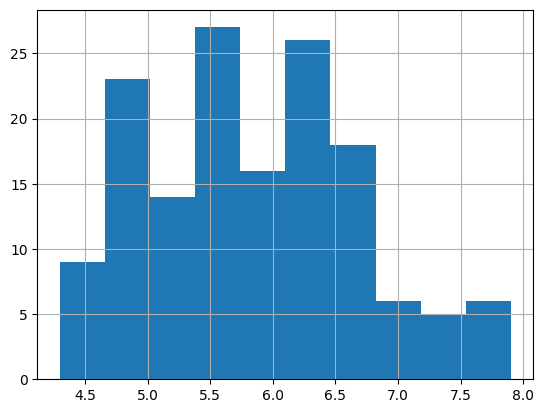

In [73]:
df['SepalLengthCm'].hist()

<Axes: >

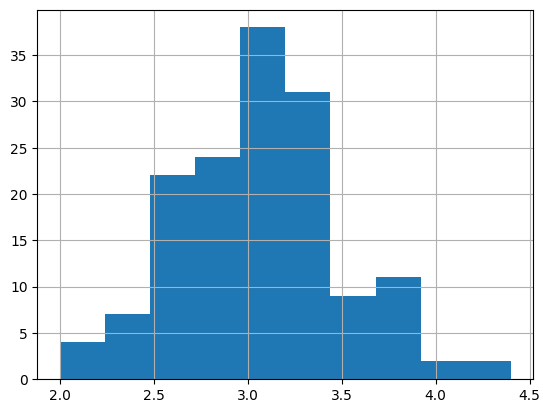

In [74]:
df['SepalWidthCm'].hist()

<Axes: >

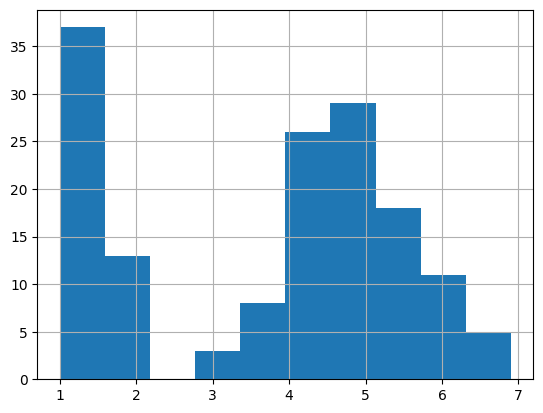

In [75]:
df['PetalLengthCm'].hist()

<Axes: >

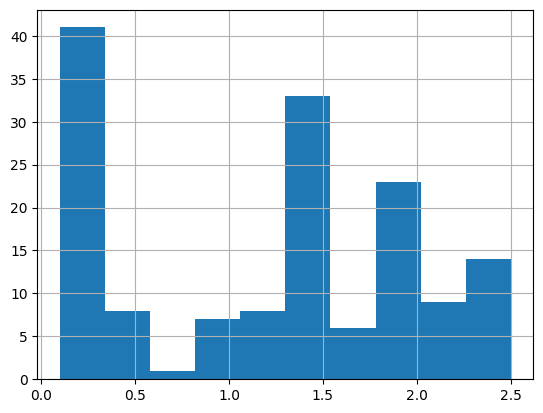

In [76]:
df['PetalWidthCm'].hist()

#Plotting the outliers

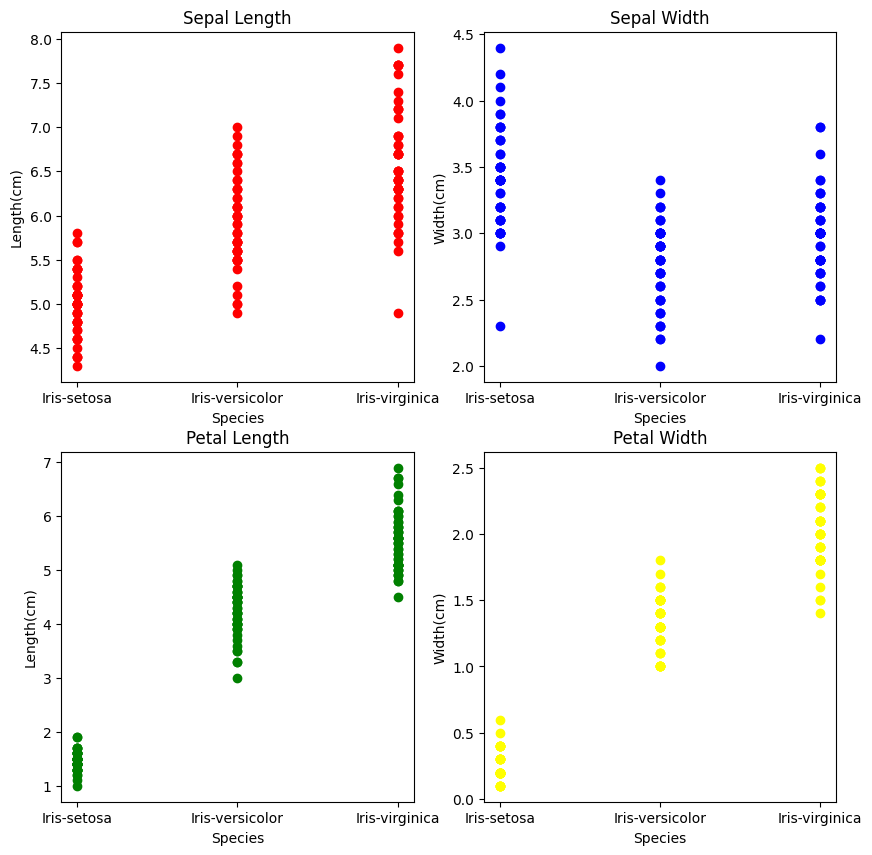

In [77]:
# Plotting the data using the subplots which plots only one single plot but with the division accordingly in the form of matrix
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].scatter(df['Species'], df['SepalLengthCm'], color='red')
axs[0,0].set_title('Sepal Length')
axs[0,0].set_xlabel('Species')
axs[0,0].set_ylabel('Length(cm)')

axs[0,1].scatter(df['Species'], df['SepalWidthCm'], color='blue')
axs[0,1].set_title('Sepal Width')
axs[0,1].set_xlabel('Species')
axs[0,1].set_ylabel('Width(cm)')

axs[1,0].scatter(df['Species'], df['PetalLengthCm'], color='green')
axs[1,0].set_title('Petal Length')
axs[1,0].set_xlabel('Species')
axs[1,0].set_ylabel('Length(cm)')

axs[1,1].scatter(df['Species'], df['PetalWidthCm'], color='yellow')
axs[1,1].set_title('Petal Width')
axs[1,1].set_xlabel('Species')
axs[1,1].set_ylabel('Width(cm)')
plt.show()

In [78]:
colors = ['red', 'blue', 'yellow']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

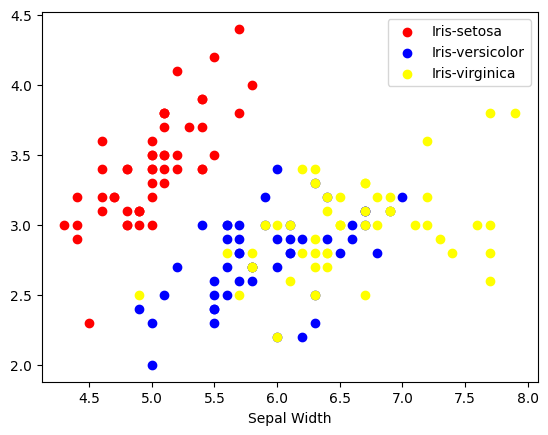

In [79]:
for i in range (3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label = species[i])

plt.xlabel('Sepal Length')
plt.xlabel('Sepal Width')
plt.legend()


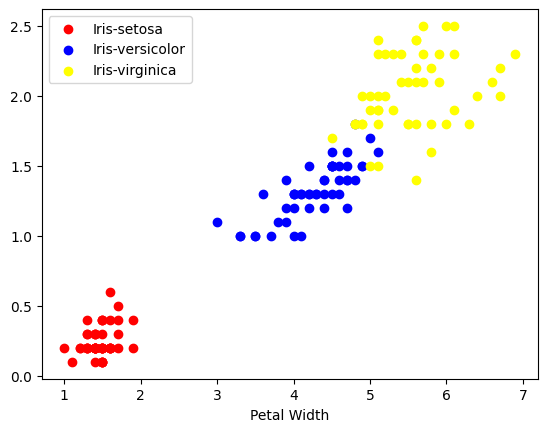

In [80]:
for i in range (3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])

plt.xlabel('Petal Length')
plt.xlabel('Petal Width')
plt.legend()

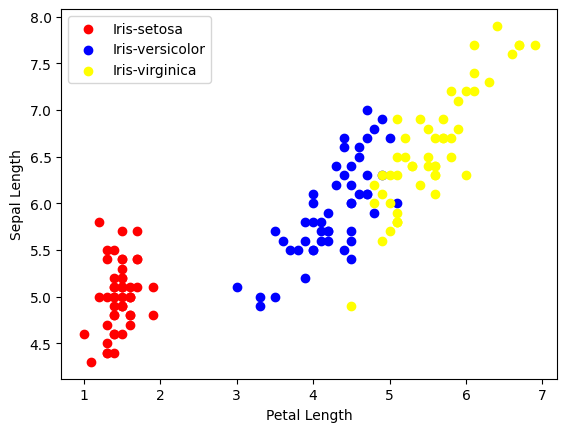

In [81]:
for i in range (3):
    x = df [df['Species'] == species[i]]
    plt.scatter (x['PetalLengthCm'], x['SepalLengthCm'], c = colors[i], label=species[i])

plt.xlabel ('Petal Length')
plt.ylabel ('Sepal Length')
plt.legend ()

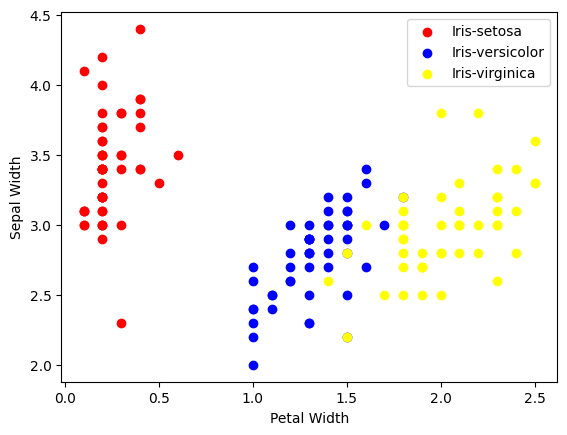

In [82]:
for i in range (3):
    x = df [df['Species'] == species[i]]
    plt.scatter (x['PetalWidthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])

plt.xlabel ('Petal Width')
plt.ylabel ('Sepal Width')
plt.legend ()

In [83]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<Axes: >

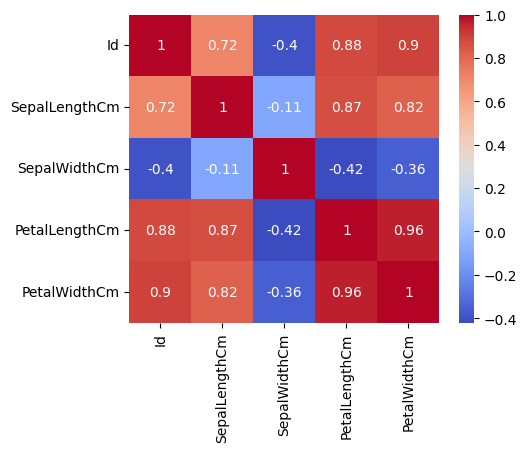

In [84]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, cmap = 'coolwarm', annot=True, ax= ax)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle


X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [112]:
model = LogisticRegression(fit_intercept=False)
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_test,y_test)*100)

Logistic Regression Accuracy:  100.0


In [99]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print("K-Nearest Neighbors Accuracy: ", model.score(x_test, y_test)*100)

K-Nearest Neighbors Accuracy:  100.0


In [97]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print("Decision Accuracy: ", model.score(x_test, y_test)*100)

Decision Accuracy:  100.0


In [122]:
prediction = model.predict([[0, 5.1,3.5,1.4,0.2]])
prediction

array(['Iris-setosa'], dtype=object)

In [121]:
prediction = model.predict([[0, 6.7, 3.1, 5.6, 2.4]])
prediction

array(['Iris-versicolor'], dtype=object)